# Calidad de vino tinto

En este ejercicio se aplicará la Random Forests en un dataset con 1599 registros.

URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## Objetivos

El trabajo consiste en encontrar los variables más representativas relacionadas con la calidad del vino. El conjunto de datos fue obtenido de Paulo Cortez, University of Minho, Guimarães, Portugal.

URL Ref: http://www3.dsi.uminho.pt/pcortez.

<h2><center>Random Forest sobre la calidad del vino tinto</center></h2>
<div align = "center"><img src = "https://panamahitek.com/wp-content/uploads/2022/11/clasificador_random_forest_panamahitek.jpg" width = "900"></div>

**¿Qué es el bosque aleatorio?**

El bosque aleatorio es un algoritmo de aprendizaje supervisado. El "bosque" que construye es un conjunto de árboles de decisión, generalmente entrenados con el método "bagging". La idea general del método de embolsado es que una combinación de modelos de aprendizaje aumenta el resultado general.

**¿Cómo funciona el bosque aleatorio?**

En pocas palabras: el bosque aleatorio crea múltiples árboles de decisión y los fusiona para obtener una predicción más precisa y estable.

Una gran ventaja del bosque aleatorio es que se puede utilizar tanto para problemas de clasificación como de regresión, que forman la mayoría de los sistemas actuales de aprendizaje automático. Veamos el bosque aleatorio en la clasificación, ya que la clasificación a veces se considera el componente básico del aprendizaje automático.

El bosque aleatorio tiene casi los mismos hiperparámetros que un árbol de decisión o un clasificador de ensacado. Afortunadamente, no es necesario combinar un árbol de decisión con un clasificador de ensacado porque puedes usar fácilmente la clase clasificadora de bosque aleatorio. Con el bosque aleatorio, también puede realizar tareas de regresión utilizando el regresor del algoritmo.

El bosque aleatorio agrega aleatoriedad adicional al modelo, mientras los árboles crecen. En lugar de buscar la característica más importante mientras divide un nodo, busca la mejor característica entre un subconjunto aleatorio de características. Esto da como resultado una amplia diversidad que generalmente resulta en un mejor modelo.

Por lo tanto, en el bosque aleatorio, el algoritmo para dividir un nodo solo tiene en cuenta un subconjunto aleatorio de las características. Incluso puedes hacer que los árboles sean más aleatorios utilizando además umbrales aleatorios para cada característica en lugar de buscar los mejores umbrales posibles (como lo hace un árbol de decisión normal).

Briemann introdujo por primera vez el bosque aleatorio en su artículo de 2001.

### 1. Generación del conjunto de datos

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from contextlib import redirect_stderr
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn import metrics
from pprint import pprint
from scipy import stats
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np
import pydotplus
import graphviz
import warnings
import sys
import os

In [2]:
#Imprima las 10 primeras filas del dataframe
df = pd.read_csv('winequality-red.csv')
warnings.filterwarnings('ignore')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Mostrar información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2. Visualización del conjunto de datos

In [4]:
# Mostrar información estadística sobre el conjunto de datos
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

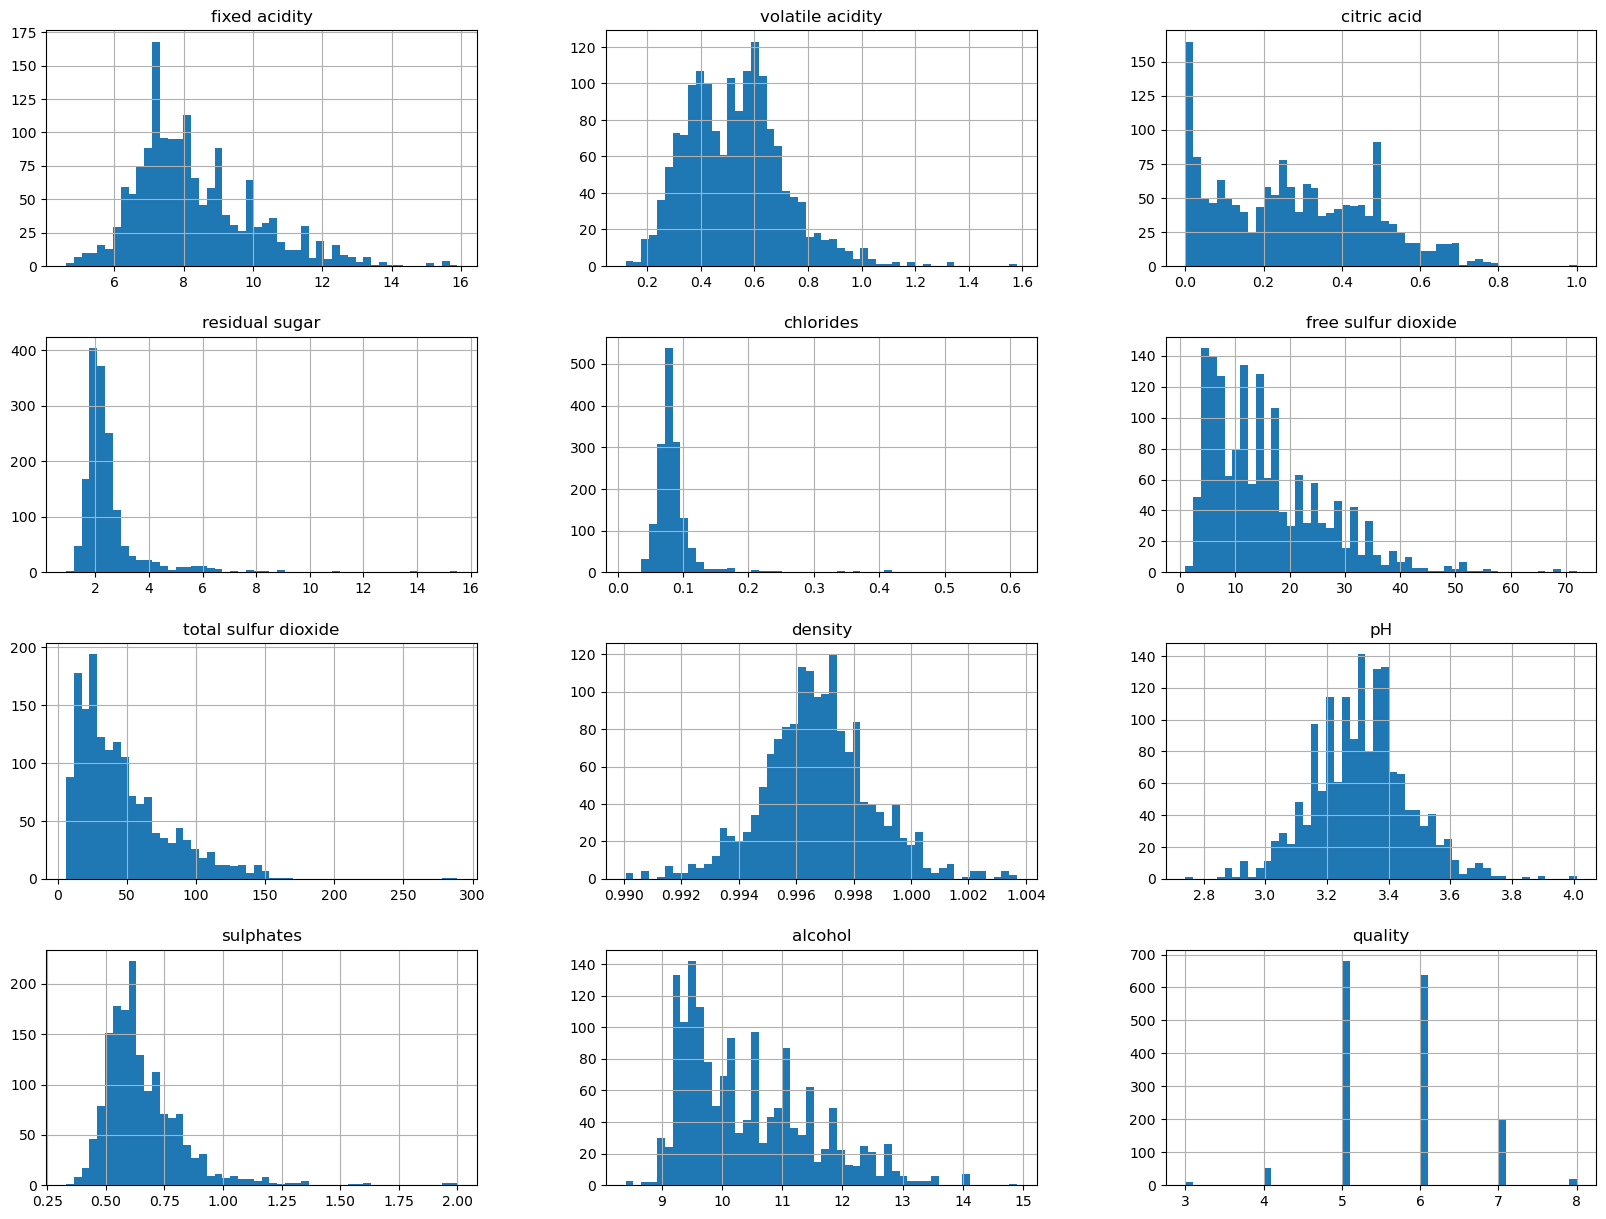

In [6]:
# Representar gráficamente la distribución de los atributos
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [7]:
print("Longitud del conjunto de datos:", len(df))
print("Número de características del conjunto de datos:", len(df.columns))

Longitud del conjunto de datos: 1599
Número de características del conjunto de datos: 12


### 3. Modificación del conjunto de datos

In [8]:
print(df.loc[1475, 'alcohol'])
print(df.loc[1514, 'alcohol'])
print(df.loc[1362, 'alcohol'])
print(df.loc[1359, 'alcohol'])
print(df.loc[1439, 'alcohol'])
print(df.loc[1441, 'alcohol'])

13.566666666666698
9.23333333333333
10.0333333333333
10.0333333333333
11.066666666666698
9.56666666666667


In [9]:
df = df.drop([1475, 1514, 1362, 1359, 1439, 1441])

In [10]:
print(df.loc[1474:1476, 'alcohol'])

1474    8.8
1476    8.8
Name: alcohol, dtype: float64


### 4. Construcción del modelo

In [11]:
# Comprobación de datos, se comprueban que no falten datos en el DataSet
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# Calcula los valores absolutos de los z-scores de cada valor en el DataFrame
z = np.abs(stats.zscore(df))
z.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.529192,0.963805,1.391332,0.452684,0.244049,0.465970,0.376938,0.557508,1.289567,0.578018,0.961260,0.784825
1,0.298989,1.969377,1.391332,0.043983,0.222789,0.872007,0.626874,0.027157,0.721571,0.129370,0.585172,0.784825
2,0.298989,1.298996,1.186092,0.168874,0.095470,0.083691,0.231433,0.133227,0.332318,0.047477,0.585172,0.784825
3,1.657735,1.382531,1.482035,0.452684,0.265269,0.107448,0.413944,0.663579,0.981072,0.460120,0.585172,0.453023
4,0.529192,0.963805,1.391332,0.452684,0.244049,0.465970,0.376938,0.557508,1.289567,0.578018,0.961260,0.784825
5,0.529192,0.740345,1.391332,0.523637,0.265269,0.274831,0.194427,0.557508,1.289567,0.578018,0.961260,0.784825
6,0.241438,0.405154,1.083471,0.665542,0.392589,0.083691,0.383526,0.184984,0.072817,1.167508,0.961260,0.784825
7,0.586743,0.684479,1.391332,0.949352,0.477469,0.083691,0.772379,1.139616,0.511062,1.108559,0.397129,1.690871
8,0.298989,0.293423,1.288712,0.381732,0.307709,0.657110,0.863634,0.027157,0.316436,0.519069,0.867238,1.690871
9,0.471641,0.153498,0.455832,2.527322,0.350149,0.107448,1.691523,0.557508,0.251560,0.836757,0.072981,0.784825


In [13]:
# Eliminación de valores atípicos basada en puntuación Z
threshold = 3
np.where(z > 3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [14]:
df_o = df[(z < 3).all(axis = 1)]
print("Antiguo Shape: ", df.shape)
print("Nuevo Shape: ", df_o.shape)

Antiguo Shape:  (1593, 12)
Nuevo Shape:  (1445, 12)


In [15]:
# División de los datos en conjuntos de entrenamiento y prueba.
X = df_o.drop(columns = 'quality', axis = 1)
y = df_o['quality']
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [16]:
y.head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [17]:
# Ajuste básico de bosque aleatorio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Crear un modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = rf_model.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6851211072664359


In [19]:
feature_imp = pd.Series(rf_model.feature_importances_, index = df_o.columns[:11]).sort_values(ascending = False)
feature_imp

alcohol                 0.155064
sulphates               0.112181
total sulfur dioxide    0.108007
volatile acidity        0.099263
density                 0.089677
citric acid             0.079087
chlorides               0.077070
fixed acidity           0.072973
pH                      0.072053
residual sugar          0.071374
free sulfur dioxide     0.063252
dtype: float64

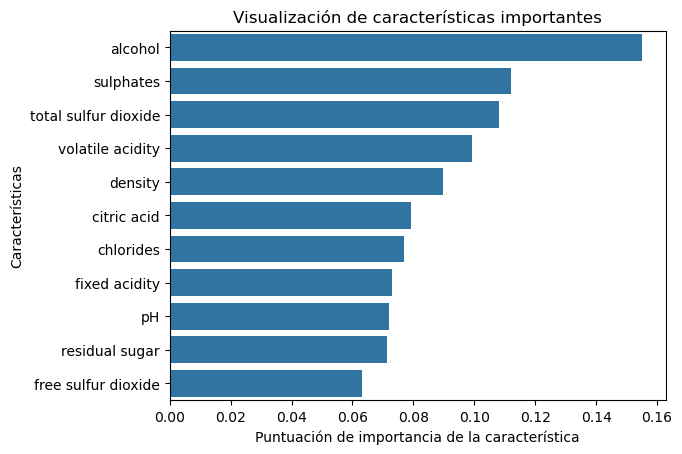

In [20]:
# Visualización de características importantes
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Puntuación de importancia de la característica')
plt.ylabel('Características')
plt.title("Visualización de características importantes")
plt.show()

In [21]:
# Ajuste fino usando RandomSearchCV
rf = RandomForestRegressor(random_state = 42)
print('Parámetros actualmente en uso:\n')
pprint(rf.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [22]:
# Número de árboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de características a considerar en cada división
max_features = ['auto', 'sqrt']
# Número máximo de niveles en el árbol.
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Número mínimo de muestras necesarias para dividir un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada nodo de hoja
min_samples_leaf = [1, 2, 4]
# Método de selección de muestras para entrenar cada árbol.
bootstrap = [True, False]
# Crea la cuadrícula aleatoria
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [23]:
# Utilice la cuadrícula aleatoria para buscar los mejores hiperparámetros
# Primero crea el modelo base para ajustar
rf = RandomForestRegressor()
# Búsqueda aleatoria de parámetros, utilizando validación cruzada triple,
# Busque en 100 combinaciones diferentes y utilice todos los núcleos disponibles
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
# Ajustar el modelo de búsqueda aleatoria
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [24]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Rendimiento del modelo')
    print('Error promedio: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test,y_test)

Rendimiento del modelo
Error promedio: 0.4419
Accuracy = 92.08%.


In [25]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Rendimiento del modelo
Error promedio: 0.4299
Accuracy = 92.31%.


In [26]:
print('Mejora de {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Mejora de 0.25%.


In [27]:
# Ajuste fino con GridSearchCV
# Crea la cuadrícula de parámetros basada en los resultados de la búsqueda aleatoria.
param_grid = {
    'bootstrap'        : [True],
    'max_depth'        : [8, 10, 12, 14],
    'max_features'     : [2, 3],
    'min_samples_leaf' : [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators'     : [100, 200, 300, 1000]
}
# Crear un modelo basado
rf = RandomForestRegressor()
# Crear una instancia del modelo de búsqueda de cuadrícula
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# Ajustar la búsqueda de cuadrícula a los datos.
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 14,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [28]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Rendimiento del modelo
Error promedio: 0.4441
Accuracy = 92.09%.


### 5. Predicción

Informe de Clasificación
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.70      0.78      0.73       116
           6       0.67      0.71      0.69       129
           7       0.67      0.52      0.58        31
           8       1.00      0.25      0.40         4

    accuracy                           0.69       289
   macro avg       0.61      0.45      0.48       289
weighted avg       0.67      0.69      0.67       289

Confusion Matrix


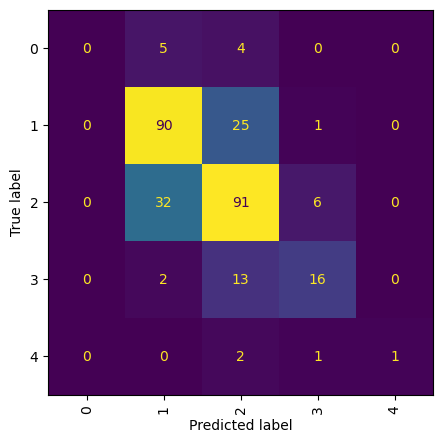

In [29]:
# Imprimir informe de clasificación
print("Informe de Clasificación")
print(classification_report(y_test, y_pred))
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
# class_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
# disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = class_names)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
fig, ax = plt.subplots(figsize = (5, 5))
disp = disp.plot(xticks_rotation = 'vertical', ax = ax, colorbar = False)
plt.show()

### 6. Tree Visualisation

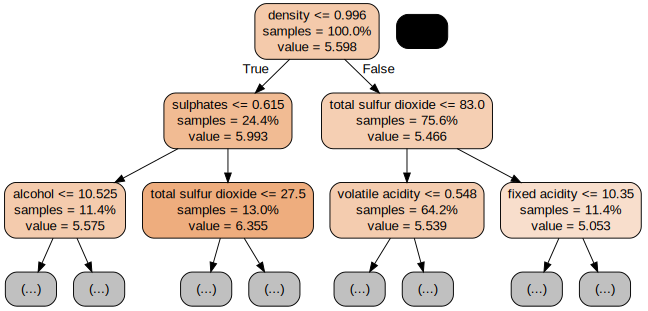

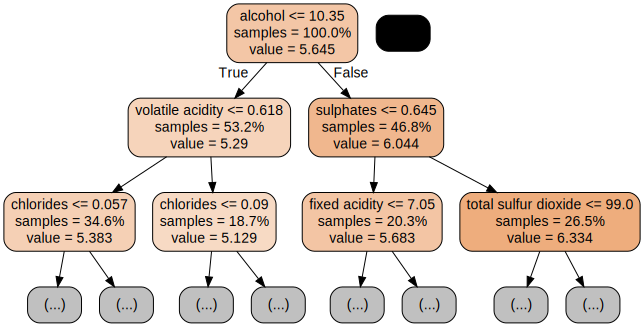

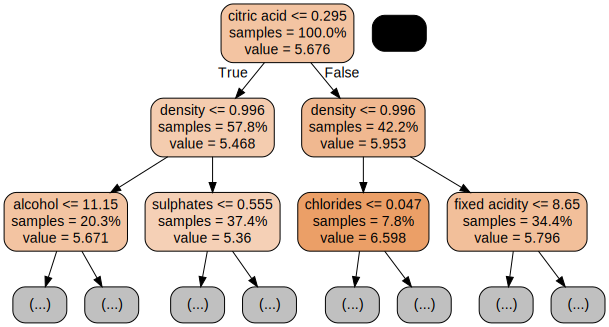

In [30]:
# Exporte los primeros tres árboles de decisión del bosque.
for i in range(3):
    tree = best_grid.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = X_train.columns,  
                               impurity      = False, 
                               proportion    = True,
                               rounded       = True,
                               filled        = True,
                               max_depth     = 2)
    print("\n\n\n")
    
    # Redirigir stderr para evitar el warning
    with redirect_stderr(open(os.devnull, 'w')):
        graph = pydotplus.graph_from_dot_data(dot_data)
        graph.set_size('"9, 30"')
        gvz_graph = graphviz.Source(graph.to_string())
        display(gvz_graph)